In [1]:
import matplotlib.pyplot as plt
import os
import glob
from astar import *
from bfs import *
from ucs import *
from general import searchChar
import tracemalloc
import gc

def inputGrid(file_path):
    with open(file_path, 'r') as file: 
        line = file.readline().strip().split()
        row, col = list(map(int, line))
        
        grid = []
        for _ in range(row): 
            line = file.readline().strip().split()
            grid.append(list(line))
        
        start = searchChar("S", row, col, grid)
        goal = searchChar("G", row, col, grid)

        return row, col, grid, start, goal

In [2]:
rows = []
cols = []
grids = []
starts = []
goals = []
count = 0


dataset_path = os.path.join(os.getcwd(), '../dataset/*.txt') # 2. Ambil semua file yang cocok dengan pola tersebut
file_list = glob.glob(dataset_path) 

for file in file_list:
    row, col, grid, start, goal = inputGrid(file)
    rows.append(row)
    cols.append(col)
    grids.append(grid)
    starts.append(start)
    goals.append(goal)
    count += 1

In [3]:
# ...existing code...
import tracemalloc
import gc

bfs_explored = []
bfs_cost = []
bfs_time = []
bfs_memory = []

UCS_explored = []
UCS_cost = []
UCS_time = []
UCS_memory = []

Astar_explored = []
Astar_cost = []
Astar_time = []
Astar_memory = []

tracemalloc.start()    # start tracer once

for i in range(count):
    gc.collect()
    tracemalloc.reset_peak()
    nExp_BFS, pathCost_BFS, path_BFS, time_BFS, _ = BFS(rows[i], cols[i], grids[i], starts[i], goals[i])
    current, peak = tracemalloc.get_traced_memory()
    bfs_explored.append(nExp_BFS)
    bfs_cost.append(pathCost_BFS)
    bfs_time.append(time_BFS)
    bfs_memory.append(peak)   # store peak bytes

for i in range(count):
    gc.collect()
    tracemalloc.reset_peak()
    nExp_UCS, pathCost_UCS, path_UCS, time_UCS, _ = UCS(rows[i], cols[i], grids[i], starts[i], goals[i])
    current, peak = tracemalloc.get_traced_memory()
    UCS_explored.append(nExp_UCS)
    UCS_cost.append(pathCost_UCS)
    UCS_time.append(time_UCS)
    UCS_memory.append(peak)

for i in range(count):
    gc.collect()
    tracemalloc.reset_peak()
    nExp_Astar, pathCost_Astar, path_Astar, time_Astar, _ = astar(rows[i], cols[i], grids[i], starts[i], goals[i])
    current, peak = tracemalloc.get_traced_memory()
    Astar_explored.append(nExp_Astar)
    Astar_cost.append(pathCost_Astar)
    Astar_time.append(time_Astar)
    Astar_memory.append(peak)

tracemalloc.stop()

In [6]:
def visualize(data : list[list[int]], jenisSebaran: str, ylabel):
    fig = plt.figure(figsize =(10, 7))
    plotAxis = fig.add_subplot(111)

    boxplot = plotAxis.boxplot(data, patch_artist = True, notch =False, vert = 1)

    # changing color of boxes
    for patch in boxplot['boxes']:
        patch.set_facecolor('#7cc0d8')

    # changing style of medians
    for median in boxplot['medians']:
        median.set(color ='#134b5f', linewidth = 1.5)

    plotAxis.set_xticklabels(['BFS', 'UCS', 'A*'])
    
    plt.title(f"Sebaran {jenisSebaran} pada Setiap Algoritma")
    plt.ylabel(f"{ylabel}")  


    plt.show()

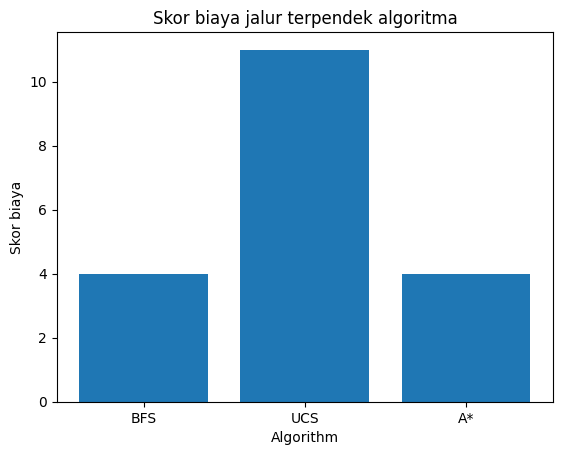

In [ ]:
databfs = bfs_cost.copy()
dataUCS = UCS_cost.copy()
dataAstar = Astar_cost.copy()

bfs_score = 0
UCS_score = 0
Astar_score = 0

# gunakan nama sementara untuk nilai per-algoritma, jangan timpa list
for b_cost, u_cost, a_cost in zip(bfs_cost, UCS_cost, Astar_cost):
    # bandingkan tiga nilai dan tambahkan ke skor masing2
    if b_cost < u_cost or b_cost < a_cost:
        bfs_score += 2 if (b_cost < u_cost and b_cost < a_cost) else 1
    if u_cost < b_cost or u_cost < a_cost:
        UCS_score += 2 if (u_cost < b_cost and u_cost < a_cost) else 1
    if a_cost < u_cost or a_cost < b_cost:
        Astar_score += 2 if (a_cost < u_cost and a_cost < b_cost) else 1

algo = ['BFS', 'UCS', 'A*']
score = [bfs_score, UCS_score, Astar_score]

plt.bar(algo, score)
plt.title('Skor biaya jalur terpendek algoritma')
plt.xlabel('Algorithm')
plt.ylabel('Skor biaya')
plt.show()

[934.9251070435314, 931.6113985445467, 937.4692629208157]


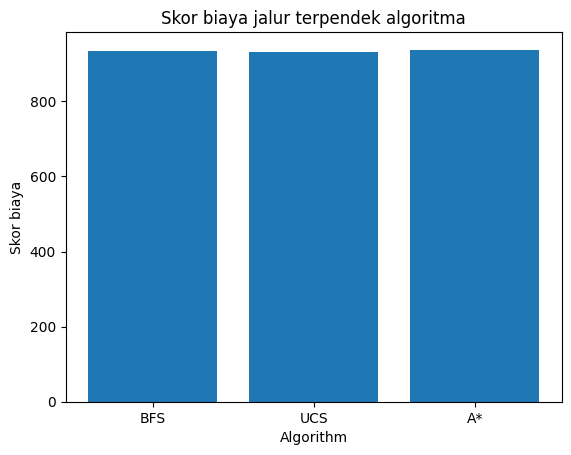

[1.0, 1.0, 1.0]


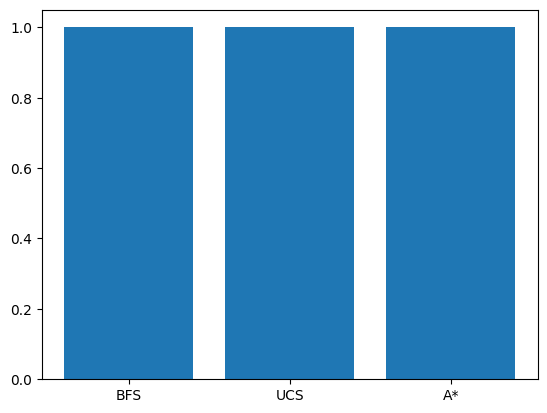

In [ ]:
import math

databfs = bfs_cost.copy()
dataUCS = UCS_cost.copy()
dataAstar = Astar_cost.copy()

def sigmoid(x):
    return 1.0 / (1.0 + math.exp(-x))


bfs_score = sum(databfs)
UCS_score = sum(dataUCS)
Astar_score = sum(dataAstar)

algo = ['BFS', 'UCS', 'A*']
score = [bfs_score, UCS_score, Astar_score]
print(score)

plt.bar(algo, score)
plt.title('Skor biaya jalur terpendek algoritma')
plt.xlabel('Algorithm')
plt.ylabel('Skor biaya')
plt.show()

bfs_score = sigmoid(bfs_score)
UCS_score = sigmoid(UCS_score)
Astar_score = sigmoid(Astar_score)

score = [bfs_score, UCS_score, Astar_score]
print(score)
plt.bar(algo, score)
plt.show()

[14, 15, 17, 15, 9901, 28, 32, 22, 42, 249501, 68, 24, 1, 1]
[16, 15, 17, 14, 10000, 27, 35, 21, 44, 250000, 68, 23, 1, 1]
[5, 15, 12, 11, 100, 12, 9, 8, 9, 500, 17, 10, 1, 1]


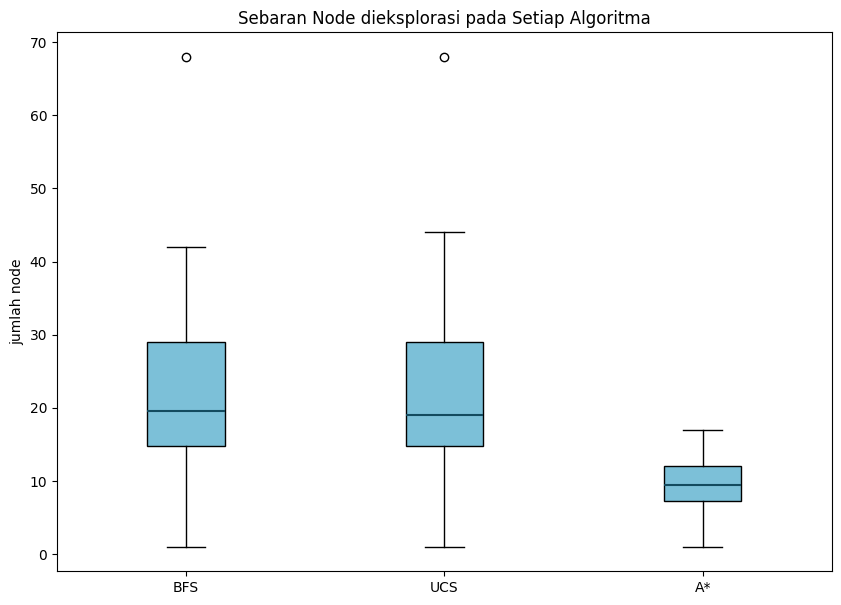

In [ ]:
#explored
databfs = bfs_explored.copy()
dataUCS = UCS_explored.copy()
dataAstar = Astar_explored.copy()

databfs.pop(4)
databfs.pop(8)
dataUCS.pop(4)
dataUCS.pop(8)
dataAstar.pop(4)
dataAstar.pop(8)

data = [databfs, dataUCS, dataAstar]
visualize(data, "Node dieksplorasi", "jumlah node")

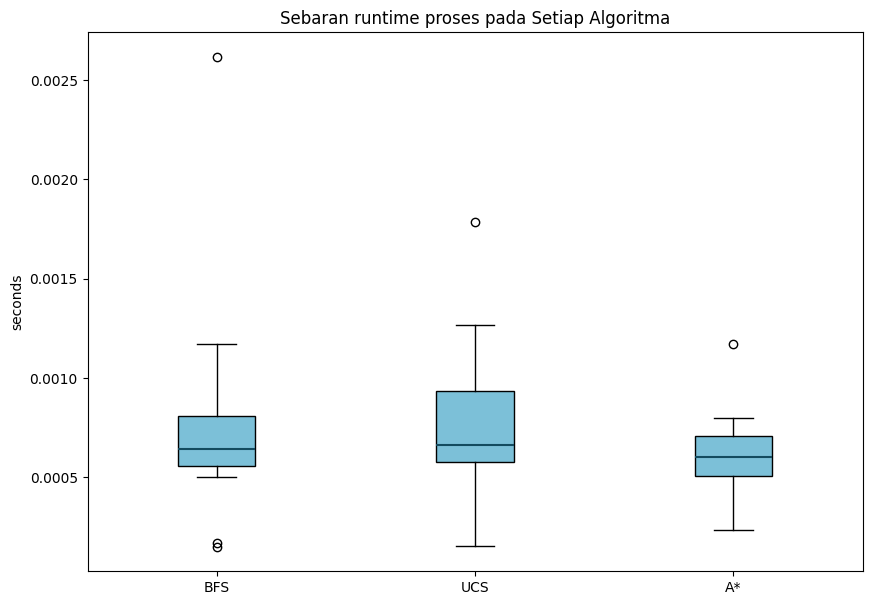

In [ ]:
#runtime
databfs = bfs_time.copy()
dataUCS = UCS_time.copy()
dataAstar = Astar_time.copy()

databfs.pop(4)
databfs.pop(8)
dataUCS.pop(4)
dataUCS.pop(8)
dataAstar.pop(4)
dataAstar.pop(8)

data = [databfs, dataUCS, dataAstar]
visualize(data, "runtime proses", "seconds")

In [8]:
print(bfs_memory)
print(UCS_memory)
print(Astar_memory)

[10301, 8652, 8048, 9532, 2574452, 18716, 13232, 11212, 16096, 71942752, 78480, 12676, 7528, 7220]
[13360, 14092, 13704, 15244, 2576884, 24516, 18944, 16868, 21920, 71946360, 83376, 17388, 12344, 12036]
[14758, 15234, 15310, 16706, 343390, 25154, 16662, 15898, 18398, 8123106, 77622, 17794, 13390, 13010]


[10.0595703125, 8.44921875, 7.859375, 9.30859375, 18.27734375, 12.921875, 10.94921875, 15.71875, 76.640625, 12.37890625, 7.3515625, 7.05078125]
[13.046875, 13.76171875, 13.3828125, 14.88671875, 23.94140625, 18.5, 16.47265625, 21.40625, 81.421875, 16.98046875, 12.0546875, 11.75390625]
[14.412109375, 14.876953125, 14.951171875, 16.314453125, 24.564453125, 16.271484375, 15.525390625, 17.966796875, 75.802734375, 17.376953125, 13.076171875, 12.705078125]


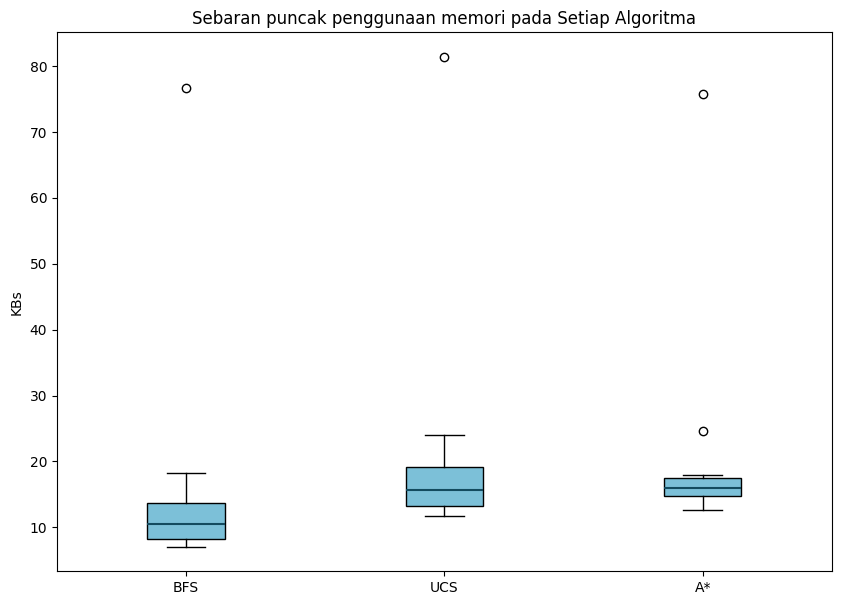

In [10]:
#memory
def bToKb(x): 
    return x / 1024

databfs = bfs_memory.copy()
dataUCS = UCS_memory.copy()
dataAstar = Astar_memory.copy()

databfs = [bToKb(x) for x in bfs_memory]
dataUCS = [bToKb(x) for x in UCS_memory]
dataAstar = [bToKb(x) for x in Astar_memory]

# Hilangin pencilan
databfs.pop(4)
databfs.pop(8)
# databfs.pop(8)
dataUCS.pop(4)
dataUCS.pop(8)
# dataUCS.pop(8)
dataAstar.pop(4)
dataAstar.pop(8)
# dataAstar.pop(8)

print(databfs)
print(dataUCS)
print(dataAstar)

data = [databfs, dataUCS, dataAstar]
visualize(data, "puncak penggunaan memori", "KBs")